In [ ]:
import matplotlib.pyplot as plt
import pickle
def save_obj(obj,path):
    with open(path, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

Comet, J. P., Bernot, G., Das, A., Diener, F., Massot, C., & Cessieux, A. (2012). Simplified models for the mammalian circadian clock. Procedia Computer Science, 11, 127-138

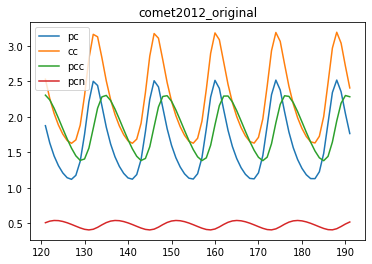

In [1]:
global pc,cc,pcc,pcn
global k,n,v1,v2,k1,k2,k3,k4,kd1,kd2,kd3,kd4

list_entite_name = ['pc','cc','pcc','pcn']

k=0.4
n=15
v1=2
v2=2.2
k1=0.08
k2=0.06
k3=0.08
k4=0.06
kd1=0.05
kd2=0.05
kd3=0.05
kd4=0.25

def d_pc():
    return (k**n/(k**n+pcn**n))*v1 - k3*pc*cc + k4*pcc - kd1*pc
def d_cc():
    return (k**n/(k**n+pcn**n))*v2 - k3*pc*cc + k4*pcc - kd2*cc
def d_pcc():
    return k3*pc*cc - k4*pcc - k1*pcc + k2*pcn - kd3*pcc
def d_pcn():
    return k1*pcc - k2*pcn -kd4*pcn

pc=1.5
cc=2
pcc=1
pcn=0.5

list_pc=[]
list_cc=[]
list_pcc=[]
list_pcn=[]

time_axis = []

Nb_point = 19200
deltat=0.01
    

for i in range(1,Nb_point):
    current_time = i*deltat
    del_pc=d_pc()
    del_cc=d_cc()
    del_pcc=d_pcc()
    del_pcn=d_pcn()
    
    pc = pc + del_pc*deltat
    cc = cc + del_cc*deltat
    pcc = pcc + del_pcc*deltat
    pcn = pcn + del_pcn*deltat
    
    if current_time>120 and i%100==0:
        list_pc+=[(current_time,pc)]
        list_cc+=[(current_time,cc)]
        list_pcc+=[(current_time,pcc)]
        list_pcn+=[(current_time,pcn)]
        time_axis += [current_time] 
data = dict()
data['pc'] = list_pc
data['cc'] = list_cc
data['pcc'] = list_pcc
data['pcn'] = list_pcn

total_time = current_time

save_obj(data,'./data_comet2012')

for i in range(len(list_entite_name)):
    plt.plot(time_axis,[ele[1] for ele in data[list_entite_name[i]]], label=list_entite_name[i])
plt.legend()
plt.title('comet2012_original')
plt.savefig('./comet2012_original.png')

Almeida, S., Chaves, M., & Delaunay, F. (2020). Cell cycle period control through modulation of clock inputs. Journal of Bioinformatics and Computational Biology, 18(03), 2040006.


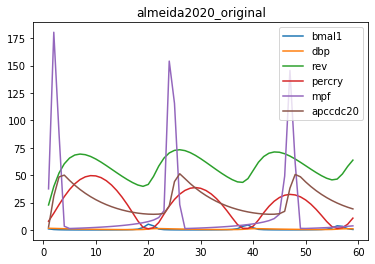

In [4]:
global bmal1,dbp,rev,percry,mpf,apccdc20
global vc,kc,vm,kw,vm,vk,v1,km,kn,mpfmax,vr,krr,vb,vbp,vd2,vrev,vdb

list_entite_name = ['bmal1','dbp','rev','percry','mpf','apccdc20']

bmal1=1.2
dbp=1.6
rev=1.5
percry=1.2
mpf=2
apccdc20=1

vc=2260
kc=130
vw=7480
kw=138
vm=0.168
vk=0.107
v1=0.162
km=99
kn=0.116
mpfmax=284
vr=34.4
krr=80.1
vb=0.11
vbp=2
vd2=14.7
vrev=0.187
vdb=0.121
cb=10
ks=10

GF=10

def d_bmal1():
    return vr*(ks/(ks+GF))*(krr*krr/(krr*krr+rev*rev)) - vbp*bmal1*percry
def d_dbp():
    return vb*bmal1 - vdb*dbp
def d_rev():
    return vd2*dbp - vrev*rev
def d_percry():
    return vd2*dbp - vbp*bmal1*percry
def d_mpf():
    return GF + vc*((mpfmax-mpf)/(mpfmax-mpf+kc))*((mpf*mpf)/(mpf*mpf+km*km)) - cb*vm*bmal1*(mpf/(mpf+kw))*(kn*kn/(mpf*mpf+kn*kn)) - v1*apccdc20*mpf
def d_apccdc20():
    return vm*mpf - vk*apccdc20

bmal1=1.2
dbp=1.6
rev=1.5
percry=1.2
mpf=2
apccdc20=1

list_bmal1=[]
list_dbp=[]
list_rev=[]
list_percry=[]
list_mpf=[]
list_apccdc20=[]

time_axis = []

Nb_point = 6000
deltat=0.01
    

for i in range(1,Nb_point):
    current_time = i*deltat
    del_bmal1=d_bmal1()
    del_dbp=d_dbp()
    del_rev=d_rev()
    del_percry=d_percry()
    del_mpf=d_mpf()
    del_apccdc20=d_apccdc20()
    
    bmal1 = bmal1 + del_bmal1*deltat
    dbp = dbp + del_dbp*deltat
    rev = rev + del_rev*deltat
    percry = percry + del_percry*deltat
    mpf = mpf + del_mpf*deltat
    apccdc20 = apccdc20 + del_apccdc20*deltat
    
    
    if current_time>0 and i%100==0:
#     if current_time>0:
#     if current_time>168:
        list_bmal1+=[(current_time,bmal1)]
        list_dbp+=[(current_time,dbp)]
        list_rev+=[(current_time,rev)]
        list_percry+=[(current_time,percry)]
        list_mpf+=[(current_time,mpf)]
        list_apccdc20+=[(current_time,apccdc20)]

        time_axis += [current_time] 
data = dict()
data['bmal1'] = list_bmal1
data['dbp'] = list_dbp
data['rev'] = list_rev
data['percry'] = list_percry
data['mpf'] = list_mpf
data['apccdc20'] = list_apccdc20

total_time = current_time

save_obj(data,'./data_almeida2020')

for i in range(len(list_entite_name)):
    plt.plot(time_axis,[ele[1] for ele in data[list_entite_name[i]]], label=list_entite_name[i])
plt.legend()
plt.title('almeida2020_original')
plt.savefig('./almeida2020_original.png')